## Seting up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/)


  <img src="https://www.researchgate.net/publication/322233081/figure/fig3/AS:960478163517451@1606007247216/Example-MNIST-hand-written-digits-images.jpg" />

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Analysing the DataSet

In [ ]:
print("No of Training Dataset : ", len(x_train))
print("No of Testing  Dataset : ", len(x_test))
print("Shape of Dataset[0] : ", x_train[0].shape)

No of Training Dataset :  60000
No of Testing  Dataset :  10000
Shape of Dataset[0] :  (28, 28)


the preview of first value of training dataset :  5


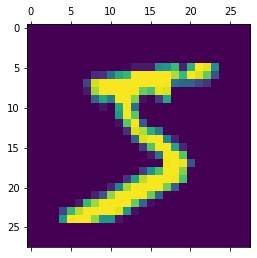

In [ ]:
print("the preview of first value of training dataset : ", y_train[0])
plt.matshow(x_train[0])

### Normalizing the images
The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster and reduce the chances of getting stuck in local optima

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Reshaping the dataset

Since we are building a fully connected network, we reshape the training set and the test set to be into the vector format.Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]

In [ ]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_train_flatten.shape

(60000, 784)

In [ ]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_test_flatten.shape

(10000, 784)

## Build a machine learning model

Build a `tf.keras.Sequential` model:
Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables.

Flatten means matrix pixel are aligned to a straight line strip containing values of each pixel

<img src="https://www.linkpicture.com/q/LPic63d95bebbeb461262330787.jpg"/>

In [ ]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4664 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2665 - accuracy: 0.9249


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_flatten, y_test)
test_accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - accuracy: 0.9253


[0.26667389273643494, 0.9253000020980835]

## Predict the image with built model
* Preview of the image[0] in the test Dataset.
* Followed by prediction result for each category.
* Finding key of the max prediction value result array


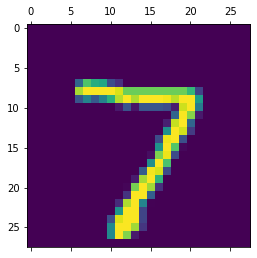

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.7573358e-02, 3.4400631e-07, 5.2943002e-02, 9.6531606e-01,
       3.2339797e-03, 7.2369941e-02, 2.3262171e-06, 9.9972391e-01,
       9.9152051e-02, 6.4812297e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

## Analysis of the Model
* Generating predictions for the test dataset
* Build Confusion matix for further analysis of the model
* Use seaborn library for further clarity in analysis

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    4,    3,    0,    5,   11,    2,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  927,   18,    8,    2,   13,   10,   37,    5],
       [   1,    0,   18,  928,    1,   16,    4,   12,   19,   11],
       [   1,    1,    2,    1,  910,    0,   12,    3,    9,   43],
       [   7,    3,    2,   37,   10,  761,   23,    8,   33,    8],
       [   7,    3,    7,    1,    8,    7,  921,    2,    2,    0],
       [   1,    7,   23,    6,    7,    0,    0,  944,    1,   39],
       [   5,   11,    7,   24,    9,   22,   10,   11,  862,   13],
       [   7,    7,    2,   10,   22,    3,    0,   18,    8,  932]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

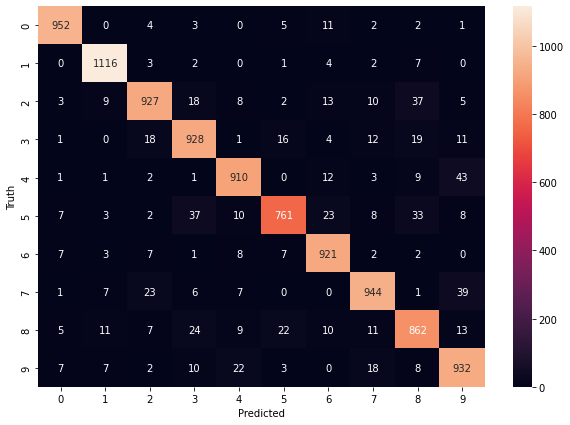

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Model Enhancement for better Accuracy
* Normalising Data 
* Increasing no of Hidden layers
* Changing activation function
* Changing Optimiser & Loss Function
* Increasing no of Epoch

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1185 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0502 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [ ]:
model.fit(x_train, y_train, epochs=10)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9789


[0.078322634100914, 0.9789000153541565]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

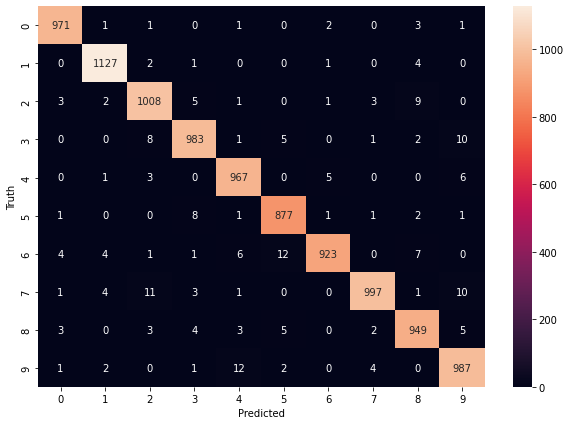

In [ ]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')